In [1]:
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
import csv
import pickle
import random
import cv2

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
import tensorflow.keras as keras
from tensorflow.math import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint

from scipy import ndimage

In [2]:
series = []

with open('/Users/langletmaxime/Desktop/ProstateX/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        #print(', '.join(row))
        if row[-2][-3:] == 'ADC':
            series.append([row[0], row[2], row[3], row[-9], row[-2],row[-1]])


series = sorted(series, key=lambda x: (x[0],x[1]))

print(np.asarray(series).shape)
print(series)

(341, 6)
[['ProstateX-0000', '1', '25.7457 31.8707 -38.511', '36 72 9', 'ep2d_diff_tra_DYNDIST_ADC', '7'], ['ProstateX-0001', '1', '-40.5367071921656 29.320722668457 -16.7076690704346', '34 63 10', 'ep2d_diff_tra_DYNDIST_MIX_ADC', '8'], ['ProstateX-0002', '1', '-27.0102 41.5467 -26.0469', '33 71 12', 'ep2d_diff_tra_DYNDIST_ADC', '7'], ['ProstateX-0002', '2', '-2.058 38.6752 -34.6104', '45 70 9', 'ep2d_diff_tra_DYNDIST_ADC', '7'], ['ProstateX-0003', '1', '22.1495 31.2717 -2.45933', '54 68 11', 'ep2d_diff_tra_DYNDIST_ADC', '6'], ['ProstateX-0003', '2', '-21.2871 19.3995 19.7429', '33 57 16', 'ep2d_diff_tra_DYNDIST_ADC', '6'], ['ProstateX-0004', '1', '-7.69665 3.64226 23.1659', '50 58 8', 'ep2d_diff_tra_DYNDIST_MIX_ADC', '7'], ['ProstateX-0005', '0', '-14.5174331665039 49.4428329467773 20.7815246582031', '46 75 9', 'ep2d_diff_tra_DYNDIST_MIX_ADC', '7'], ['ProstateX-0005', '1', '-22.0892639160156 25.4668045043945 22.8791542053223', '42 63 9', 'ep2d_diff_tra_DYNDIST_MIX_ADC', '7'], ['Prosta

In [3]:
# True or false extraction for ADC images from csv file

clinsig = []

with open('/Users/langletmaxime/Desktop/ProstateX/ProstateX-TrainingLesionInformationv2/ProstateX-Findings-Train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        clinsig.append([row[0],row[1], row[2], row[-1]])
    clinsig.remove(clinsig[0])

clinsig2 = clinsig
#for n in range(len(clinsig)):
    #print(n, clinsig[n])
    
cp = []
cl = clinsig.copy()
j=0
n=0
seen = []

while j != len(series):
    if clinsig[n][0] == series[j][0] and clinsig[n][1] == series[j][1] and clinsig[n][2] == series[j][2]:
        if clinsig[n] not in seen:
            cp.append([clinsig[n], series[j]])
            seen.append(clinsig[n])
        j+=1
    n+=1
    if n == len(clinsig):
        n=0

print(clinsig)
print(len(clinsig))

[['ProstateX-0000', '1', '25.7457 31.8707 -38.511', 'TRUE'], ['ProstateX-0001', '1', '-40.5367071921656 29.320722668457 -16.7076690704346', 'FALSE'], ['ProstateX-0002', '1', '-27.0102 41.5467 -26.0469', 'TRUE'], ['ProstateX-0002', '2', '-2.058 38.6752 -34.6104', 'FALSE'], ['ProstateX-0003', '1', '22.1495 31.2717 -2.45933', 'FALSE'], ['ProstateX-0003', '2', '-21.2871 19.3995 19.7429', 'FALSE'], ['ProstateX-0004', '1', '-7.69665 3.64226 23.1659', 'FALSE'], ['ProstateX-0005', '0', '-14.5174331665039 49.4428329467773 20.7815246582031', 'TRUE'], ['ProstateX-0005', '1', '-38.6276 42.2781 21.4084', 'TRUE'], ['ProstateX-0005', '1', '-22.0892639160156 25.4668045043945 22.8791542053223', 'FALSE'], ['ProstateX-0006', '1', '8.20024 28.2665 -10.4784', 'FALSE'], ['ProstateX-0006', '2', '-9.85971 37.2739 0.561445', 'FALSE'], ['ProstateX-0007', '1', '-5.4258 20.1075 -57.34', 'FALSE'], ['ProstateX-0008', '1', '25.2302 38.6613 -26.864', 'FALSE'], ['ProstateX-0009', '1', '19.565 32.8037 -37.4421', 'FALSE

In [4]:
series = []
clinsig = []
for i in range(0,len(cp)):
    clinsig.append(cp[i][0])
    series.append(cp[i][1])
    

    
print(len(series), len(clinsig), series[0])

330 330 ['ProstateX-0000', '1', '25.7457 31.8707 -38.511', '36 72 9', 'ep2d_diff_tra_DYNDIST_ADC', '7']


In [5]:
# file filter from preceding listing



import os
def directory_find(atom, root, series):
    for path, dirs, files in os.walk(root):
        if atom in files:
            seriesPath = os.path.join(path, atom).split('/')
            tempPath = os.path.join(path,atom)
            if seriesPath[-2][0] == series[n][-1]  and seriesPath[-2][1] == ".":
                return tempPath[:-8]
            if seriesPath[-2][0:2] == series[n][-1] and seriesPath[-2][2] == ".":
                return tempPath[:-8]

            
paths = []
for n in range(len(series)):
    paths.append(directory_find('1-01.dcm','/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/'+series[n][0], series))
print(paths)

['/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/ProstateX-0000/07-07-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/7.000000-ep2ddifftraDYNDISTADC-48780/', '/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/ProstateX-0001/07-08-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-95738/8.000000-ep2ddifftraDYNDISTMIXADC-33954/', '/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/ProstateX-0002/07-15-2011-MR prostaat kanker detectiemc MCAPRODET-88784/7.000000-ep2ddifftraDYNDISTADC-78067/', '/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/ProstateX-0002/07-15-2011-MR prostaat kanker detectiemc MCAPRODET-88784/7.000000-ep2ddifftraDYNDISTADC-78067/', '/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/ProstateX-0003/10-17-2011-MC prostaat kliniek detectie-mc MCPROSKL30-03010/6.000000-ep2ddifftraDYNDISTADC-83547/', '/Users/langletmaxime/Desktop/ProstateX/PROSTATEx/ProstateX-0003/10-17-2011-MC prostaat kliniek detectie-mc MCPROSKL30-03010/6.000000-ep2ddifftraDYNDISTADC-83547/', '/Users/

In [6]:
#exctracting coeficients ijk

ijk = []
for n in range(len(series)):
    temp2 = []
    temp = series[n][3].split(' ')
    temp = np.asarray(temp)
    temp2.append([temp[0].astype(int), temp[1].astype(int), temp[2].astype(int)])
    ijk.append(temp2[0])

    
print(len(ijk))
print(ijk)

330
[[36, 72, 9], [34, 63, 10], [33, 71, 12], [45, 70, 9], [54, 68, 11], [33, 57, 16], [50, 58, 8], [46, 75, 9], [42, 63, 9], [34, 71, 9], [50, 69, 11], [41, 72, 15], [45, 61, 6], [48, 68, 10], [44, 64, 13], [32, 70, 10], [49, 66, 8], [40, 74, 9], [39, 57, 11], [25, 67, 11], [40, 65, 7], [48, 55, 8], [37, 59, 5], [45, 75, 9], [45, 60, 6], [40, 75, 11], [34, 74, 9], [43, 63, 9], [56, 61, 8], [33, 68, 8], [29, 66, 10], [47, 59, 11], [44, 57, 8], [55, 74, 8], [61, 66, 25], [47, 75, 9], [39, 69, 9], [54, 62, 3], [38, 66, 5], [34, 77, 10], [53, 69, 8], [32, 69, 9], [48, 74, 12], [50, 66, 11], [52, 69, 17], [35, 69, 17], [52, 77, 16], [35, 72, 8], [48, 68, 7], [45, 76, 13], [32, 66, 9], [52, 59, 9], [52, 72, 9], [35, 63, 9], [36, 71, 8], [34, 63, 10], [51, 70, 11], [35, 72, 9], [29, 73, 14], [32, 63, 12], [45, 73, 9], [50, 67, 7], [32, 75, 5], [47, 60, 7], [35, 73, 15], [44, 61, 5], [48, 56, 12], [29, 66, 12], [43, 69, 8], [37, 78, 9], [52, 68, 8], [48, 73, 8], [49, 64, 6], [34, 70, 10], [48

In [7]:
# File storing into an array and sorted out

def file_storing(root):
    files_stored = []
    for path, dirs, files in os.walk(root):
        files = sorted(files, key = lambda x: x[:-4])
        for file in files:
            ds = dicom.dcmread(path+file)
            files_stored.append(ds)
    return files_stored

  
files_stored = []

for n in range(len(paths)):
    files_stored.append(file_storing(paths[n]))
    
print(len(files_stored), len(ijk))

330 330


In [9]:
patientID = []
for i in range(len(files_stored)):
    patientID.append(files_stored[i][0].get('PatientID'))

In [10]:
# rectifying problem with k = 25 and k<0
# necessary if not prbm later
cp = []
for n in range(len(ijk)):
    if (ijk[n][2] < 0 or ijk[n][2] > len(files_stored[n])):
        print(n, ijk[n], len(files_stored[n]))
        cp.append(n)


i=0
for n in cp:
    ijk.remove(ijk[n-i])
    files_stored.remove(files_stored[n-i])
    series.remove(series[n-i])
    clinsig.remove(clinsig[n-i])
    print(patientID[n-i])
    patientID.remove(patientID[n-i])
    i+=1

print(len(files_stored), len(ijk), len(series), len(clinsig), len(patientID))
for i in range(len(clinsig)):
    print(patientID[i], clinsig[i][0],series[i][0], clinsig[i][-1])

34 [61, 66, 25] 19
ProstateX-0025
329 329 329 329 329
ProstateX-0000 ProstateX-0000 ProstateX-0000 TRUE
ProstateX-0001 ProstateX-0001 ProstateX-0001 FALSE
ProstateX-0002 ProstateX-0002 ProstateX-0002 TRUE
ProstateX-0002 ProstateX-0002 ProstateX-0002 FALSE
ProstateX-0003 ProstateX-0003 ProstateX-0003 FALSE
ProstateX-0003 ProstateX-0003 ProstateX-0003 FALSE
ProstateX-0004 ProstateX-0004 ProstateX-0004 FALSE
ProstateX-0005 ProstateX-0005 ProstateX-0005 TRUE
ProstateX-0005 ProstateX-0005 ProstateX-0005 FALSE
ProstateX-0005 ProstateX-0005 ProstateX-0005 TRUE
ProstateX-0006 ProstateX-0006 ProstateX-0006 FALSE
ProstateX-0006 ProstateX-0006 ProstateX-0006 FALSE
ProstateX-0007 ProstateX-0007 ProstateX-0007 FALSE
ProstateX-0008 ProstateX-0008 ProstateX-0008 FALSE
ProstateX-0009 ProstateX-0009 ProstateX-0009 FALSE
ProstateX-0010 ProstateX-0010 ProstateX-0010 FALSE
ProstateX-0011 ProstateX-0011 ProstateX-0011 FALSE
ProstateX-0012 ProstateX-0012 ProstateX-0012 FALSE
ProstateX-0012 ProstateX-0012 Pr

In [11]:
# so we only have an array of picture and not dicom files then to gray scale 

for n in range(len(files_stored)):
    for i in range(len(files_stored[n])):
        files_stored[n][i] = files_stored[n][i].pixel_array
        files_stored[n][i] = files_stored[n][i].astype(float)
        files_stored[n][i] = (np.maximum(files_stored[n][i],0) / files_stored[n][i].max()) * 255.0
        files_stored[n][i] = np.uint8(files_stored[n][i])

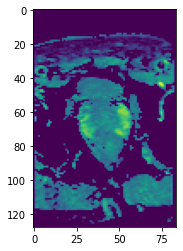

In [15]:
plt.imshow(files_stored[0][9])
plt.savefig('pic/example_ADC.png')

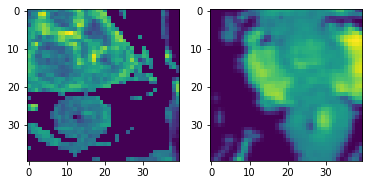

(329, 40, 40)


In [16]:
files_stored2 = []
size = 20

for i in range(len(files_stored)):
    shift=0
    x, y = ijk[i][0], ijk[i][1]
    if ijk[i][0]+size > 84:
        shift = 84-(ijk[i][0]+size)
    if ijk[i][0]-size < 0:
        shift = ijk[i][0]-size
    pic = files_stored[i][ijk[i][2]-1][ijk[i][1]-size:ijk[i][1]+size, ijk[i][0]-size-shift:ijk[i][0]+size-shift]
    #pic=cv2.resize(pic,(80,80))
    #try:
        #pic = files_stored[i][ijk[i][2]][ijk[i][1]-20:ijk[i][1]+20, ijk[i][0]-20:ijk[i][0]+20]
    #except IndexError:
        #pic = files_stored[i][ijk[i][2]-1][ijk[i][1]-20:ijk[i][1]+20, ijk[i][0]-20:ijk[i][0]+20]
    files_stored2.append(pic)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(files_stored2[33])
plt.subplot(1,2,2)
plt.imshow(ndimage.gaussian_filter(files_stored2[0], sigma=0.7))
plt.show()
#files_stored2[28] = cv2.resize(files_stored2[28],(size*2, size*2))#weird pbm just on this one
#files_stored2[33] = cv2.resize(files_stored2[33],(size*2, size*2))#weird pbm just on this one
print(np.asarray(files_stored2).shape)

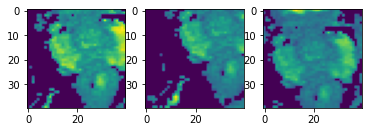

In [22]:
i=0
ijk2=ijk
shiftx=5
shifty=-5

pic = files_stored[i][ijk2[i][2]-1][ijk2[i][1]-20:ijk2[i][1]+20, ijk2[i][0]-20:ijk2[i][0]+20]
#pic = cv2.resize(pic,(size*4, size*4))

pic2 = files_stored[i][ijk2[i][2]-1][ijk2[i][1]-20+shiftx:ijk2[i][1]+20+shiftx, ijk2[i][0]-20+shifty:ijk2[i][0]+20+shifty]
#pic2 = cv2.resize(pic2,(size*4, size*4))

pic3 = files_stored[i][ijk2[i][2]-1][ijk2[i][1]-20-shiftx:ijk2[i][1]+20-shiftx, ijk2[i][0]-20-shifty:ijk2[i][0]+20-shifty]
#pic3 = cv2.resize(pic3,(size*4, size*4))

plt.figure()
plt.subplot(1,3,1)
plt.imshow(pic)
plt.subplot(1,3,2)
plt.imshow(pic2)
plt.subplot(1,3,3)
plt.imshow(pic3)
plt.savefig("pic/ADC_shift.png")
plt.show()

In [12]:
#ATTENTION: CNN not really DNN see real difference

batch_size = 32
img_height = size*2 # 80
img_width = size*2 # 80

#for now we are not going to test the training on the test database

In [13]:
final = np.zeros((len(files_stored2),img_height,img_width,1))

indexerror = 0
for n in range(len(files_stored2)):
    #final.append(files_stored2[n])
    #final[n][:][:][0] = files_stored2[n][:][:]
    for i in range(len(files_stored2[0])):
        for j in range(len(files_stored2[0])):
            try:
                final[n][i][j][0] = files_stored2[n][i][j]
            except IndexError:
                indexerror +=1
                #print(n,i,j)
                pass
print(indexerror, final.shape)

category = []
training_data = []
j=0
for i in range(len(clinsig)):
    if clinsig[i][3] == "TRUE":
        category.append(np.asarray([1,0]))
    else:
        category.append(np.asarray([0,1]))
        j +=1
print(len(category), j)#  we have a biais, keep in mind 

for k in range(len(category)):
    training_data.append([final[k], category[k]])
#print(test_data[0])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, img_height, img_width, 1))
X = np.array(X).reshape(-1, img_height, img_width, 1)

y= np.asarray(y)
print(X.shape, y.shape)

0 (329, 40, 40, 1)
329 253
(329, 40, 40, 1) (329, 2)


In [14]:
#nmbre for splitting test patients from training patients
nbr = 259

seed = np.random.randint(0, 10000)
np.random.seed(seed)
np.random.shuffle(X)
np.random.seed(seed)
np.random.shuffle(y)

np.random.seed(seed)
np.random.shuffle(patientID)

np.random.seed(seed)
np.random.shuffle(files_stored)

np.random.seed(seed)
np.random.shuffle(clinsig)

np.random.seed(seed)
np.random.shuffle(ijk)

In [15]:
X_test = X[nbr:]
X_test = X_test/255.0
y_test = y[nbr:]

nbr -=70
X_val = X[nbr:nbr+70]
y_val = y[nbr:nbr+70]

X_save = X[:nbr]
y_save = y[:nbr]

print(len(X_val), len(X_test), nbr)
print(y_val)

70 70 189
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]]


In [16]:
#model.evaluate(X_test,y_test)

In [17]:
def equalize(im):   
    hist = np.histogram(im, bins=np.arange(257))[0] 
    c_hist = np.zeros((256,))
    c=0
    for j in range(256):
        c += hist[j]
        c_hist[j] = c
    # Normalize to 0-255 range & convert to integer
    lut_eq = (255*c_hist/c_hist.max()).astype('int')
    im_eq = lut_eq[im]
    return im_eq

In [18]:
def data_augmentation(files_stored_ct, clinsig, ijk2, resize):
    # Data augmentation
    data_augmented_ct = []
    category_augmented_ct = []
    training_data_augmented_ct = []
    ones=0
    zeros=0

    if resize:
        shiftx = 10
        shifty = -10
    else:
        shiftx = 5
        shifty = -5

    for i in range(len(files_stored_ct[:nbr])):
        #x, y = ijk[i][0], ijk[i][1]
        if clinsig[i][3] == "TRUE":
            #biasing problem
            category_augmented_ct.append(np.asarray([1,0]))#category_augmented.append([0,1])
            if resize:
                pic = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-size:ijk2[i][1]+size, ijk2[i][0]-size:ijk2[i][0]+size]
                #print(pic.shape)
                #pic = cv2.resize(pic,(80, 80))
            else:
                pic = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-20:ijk2[i][1]+20, ijk2[i][0]-20:ijk2[i][0]+20]
                #pic = cv2.resize(pic,(size*4, size*4))
            data_augmented_ct.append(pic)
            ones +=1

            category_augmented_ct.append(np.asarray([1,0]))
            if resize:
                pic2 = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-size+shiftx:ijk[i][1]+size+shiftx, ijk2[i][0]-size+shifty:ijk2[i][0]+size+shifty]
                #print(pic2.shape)
                #pic2 = cv2.resize(pic2,(80, 80))
            else:
                pic2 = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-20+shiftx:ijk2[i][1]+20+shiftx, ijk2[i][0]-20+shifty:ijk2[i][0]+20+shifty]
                #pic2 = cv2.resize(pic2,(size*4, size*4))
            data_augmented_ct.append(pic2)
            ones +=1

            category_augmented_ct.append(np.asarray([1,0]))
            if resize:
                pic3 = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-size-shiftx:ijk2[i][1]+size-shiftx, ijk2[i][0]-size-shifty:ijk2[i][0]+size-shifty]
                #print(pic2.shape)
                #pic3 = cv2.resize(pic3,(80, 80))
            else:
                pic3 = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-20-shiftx:ijk2[i][1]+20-shiftx, ijk2[i][0]-20-shifty:ijk2[i][0]+20-shifty]
                #pic3 = cv2.resize(pic3,(size*4, size*4))
            data_augmented_ct.append(pic3)
            ones +=1

            #category_augmented_ct.append(np.asarray([1,0]))
            #if resize:
                #pic4 = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-size+shiftx:ijk2[i][1]+size+shiftx, ijk2[i][0]-size-shifty:ijk2[i][0]+size-shifty]
                #pic4 = cv2.resize(pic4,(80, 80))
            #else:
                #pic4 = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-20+shiftx:ijk2[i][1]+20+shiftx, ijk2[i][0]-20-shifty:ijk2[i][0]+20-shifty]
                #pic4 = cv2.resize(pic4,(80, 80))
            #data_augmented_ct.append(pic4)
            #ones +=1

            #dimming brightness
            category_augmented_ct.append(np.asarray([1,0]))
            pic6 = pic/1.25
            pic62 = pic2/1.25
            pic63 = pic3/1.25
            #pic64 = pic4/1.25
            data_augmented_ct.append(pic6)
            ones +=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(pic62)
            ones +=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(pic63)
            ones +=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(pic64)
            #ones +=1
            
            category_augmented_ct.append(np.asarray([1,0]))
            pic6 = pic/1.5
            pic62 = pic2/1.5
            pic63 = pic3/1.5
            #pic64 = pic4/1.5
            data_augmented_ct.append(pic6)
            ones +=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(pic62)
            ones +=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(pic63)
            ones +=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(pic64)
            #ones +=1
            
            category_augmented_ct.append(np.asarray([1,0]))
            pic6 = pic/1.1
            pic62 = pic2/1.1
            pic63 = pic3/1.1
            #pic64 = pic4/1.1
            data_augmented_ct.append(pic6)
            ones +=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(pic62)
            ones +=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(pic63)
            ones +=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(pic64)
            #ones +=1

            #Rotating
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic, 10, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic, -10, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic, 5, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic, -5, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic, -15, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic, 15, reshape=False))
            ones+=1

            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic2, 10, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic2, -10, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic2, 5, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic2, -5, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic2, -15, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic2, 15, reshape=False))
            ones+=1

            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic3, 10, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic3, -10, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic3, 5, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic3, -5, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic3, -15, reshape=False))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.rotate(pic3, 15, reshape=False))
            ones+=1
            
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.rotate(pic4, 10, reshape=False))
            #ones+=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.rotate(pic4, -10, reshape=False))
            #ones+=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.rotate(pic4, 5, reshape=False))
            #ones+=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.rotate(pic4, -5, reshape=False))
            #ones+=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.rotate(pic4, -15, reshape=False))
            #ones+=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.rotate(pic4, 15, reshape=False))
            #ones+=1
            
            #Contrast enhancement
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(equalize(pic))
            ones+=1

            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(equalize(pic2))
            ones+=1

            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(equalize(pic3))
            ones+=1
            
            
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(equalize(pic4))
            #ones+=1
            
            #Gaussian filter
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.gaussian_filter(pic, sigma=0.7))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.gaussian_filter(pic2, sigma=0.7))
            ones+=1
            category_augmented_ct.append(np.asarray([1,0]))
            data_augmented_ct.append(ndimage.gaussian_filter(pic3, sigma=0.7))
            ones+=1
            #category_augmented_ct.append(np.asarray([1,0]))
            #data_augmented_ct.append(ndimage.gaussian_filter(pic4, sigma=0.7))
            #ones+=1

        else:
            category_augmented_ct.append(np.asarray([0,1]))
            if resize:
                pic = files_stored_ct[i][ijk2[i][2]-1][ijk2[i][1]-size:ijk2[i][1]+size, ijk2[i][0]-size:ijk2[i][0]+size]
                #pic = cv2.resize(pic,(80, 80))
            else:
                pic = files_stored[i][ijk2[i][2]-1][ijk2[i][1]-20:ijk2[i][1]+20, ijk2[i][0]-20:ijk2[i][0]+20]
                #pic = cv2.resize(pic,(size*4, size*4))
            data_augmented_ct.append(pic)
            zeros +=1

            
            #dimming brightness
            category_augmented_ct.append(np.asarray([0,1]))
            pic2 = pic/1.25
            data_augmented_ct.append(pic2)

            zeros +=1
            
            category_augmented_ct.append(np.asarray([0,1]))
            pic2 = pic/1.5
            data_augmented_ct.append(pic2)
            zeros +=1
            
            category_augmented_ct.append(np.asarray([0,1]))
            pic2 = pic/1.1
            data_augmented_ct.append(pic2)
            zeros +=1

            #Rotating
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.rotate(pic, 10, reshape=False))
            zeros+=1
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.rotate(pic, -10, reshape=False))
            zeros+=1
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.rotate(pic, 5, reshape=False))
            zeros+=1
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.rotate(pic, -5, reshape=False))
            zeros+=1
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.rotate(pic, -15, reshape=False))
            zeros+=1
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.rotate(pic, 15, reshape=False))
            zeros+=1

            #Contrast enhancement
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(equalize(pic))
            zeros+=1
            
            #Gaussian filter
            category_augmented_ct.append(np.asarray([0,1]))
            data_augmented_ct.append(ndimage.gaussian_filter(pic, sigma=0.7))
            zeros+=1
            
    return category_augmented_ct, data_augmented_ct, ones, zeros

category, data, on, zer = data_augmentation(files_stored, clinsig, ijk, False)

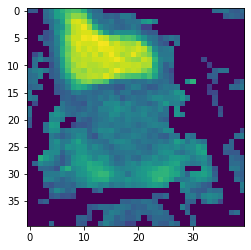

[1 0]
3372 3372 1656 1716


In [19]:
n=678
plt.figure()
plt.imshow(data[n])
plt.show()


category_augmented = category
data_augmented = data

print(category[145])
print(len(data_augmented), len(category_augmented), on, zer)

In [20]:
final = np.zeros((len(data_augmented),img_height,img_height,1))

for n in range(len(data_augmented)):
    for i in range(len(data_augmented[0])):
        for j in range(len(data_augmented[0])):
            final[n][i][j][0] = data_augmented[n][i][j]
print(final.shape)

(3372, 40, 40, 1)


In [21]:
training_data_augmented = []

for k in range(len(category_augmented)):
    training_data_augmented.append([final[k], category_augmented[k]])
    
random.shuffle(training_data_augmented)
print(len(training_data_augmented), k+1)

X = []
y = []

for features,label in training_data_augmented:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, img_height, img_width, 1))
X = np.array(X).reshape(-1, img_height, img_width, 1)

y = np.asarray(y)

print(X.shape)

3372 3372
(3372, 40, 40, 1)


In [22]:

pickle_out = open("base/X_ADC_40.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("base/y_ADC_40.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:

pickle_in = open("base/X_ADC_40.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("base/y_ADC_40.pickle","rb")
y = pickle.load(pickle_in)

y = np.asarray(y)

print(X.shape[1:])


(40, 40, 1)


In [24]:
X = X/255.0
#random.shuffle(X)
print(X.shape)

(3372, 40, 40, 1)


In [25]:
pos=0
for i in range(len(y_val)):
    if y_val[i][0]==1:
        pos +=1 
print(pos/len(y_val))

0.2571428571428571


In [26]:
X_2 = X[:2000]
y_2 = y[:2000]

In [27]:
from tensorflow.keras.layers import BatchNormalization

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)

filepath = "saved_model/best_weights"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [28]:
x_t=[]
y_t=[]
for i in range(len(X_val)):
    if y_val[i][0]==1:
        x_t.append(X_val[i])
        y_t.append(y_val[i])

n = len(x_t)*2
while len(y_t) <n:
    if y_val[i][0]==0:
        x_t.append(X_val[i])
        y_t.append(y_val[i])

x_t = np.array(x_t).reshape(-1, img_height, img_width, 1)
y_t = np.asarray(y_t)
np.random.seed(seed)
np.random.shuffle(x_t)
np.random.shuffle(y_t)
print(y_t)
print(np.asarray(y_t).shape, np.asarray(x_t).shape)

[[0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]
(36, 2) (36, 40, 40, 1)


In [29]:
#test

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))#, kernel_initializer='he_uniform',
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu'))#, kernel_initializer='he_uniform',
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3, 3), activation='relu'))#, kernel_initializer='he_uniform',
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))#, kernel_initializer='he_uniform',
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))#, kernel_initializer='he_uniform',

model.add(Dense(32, activation='relu'))#, kernel_initializer='he_uniform',

model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))
#opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',#,loss='mse'
              optimizer='adam',
              #optimizer=opt,
              #metrics=[tf.keras.metrics.FalsePositives()])
              metrics=['accuracy'])

#history = model.fit(X, y, batch_size=16, epochs=30, validation_data=(X_val,y_val), shuffle=True,callbacks=[callback])#model_checkpoint_callback, 50, 
history = model.fit(X, y, batch_size=32, epochs=50, validation_data=(X_val,y_val), shuffle=True,callbacks=[model_checkpoint_callback])#,callbacks=[callback])#model_checkpoint_callback, 50, 

Epoch 1/50
106/106 [==============================] - 3s 22ms/step - loss: 0.7045 - accuracy: 0.5244 - val_loss: 7.8502 - val_accuracy: 0.6857
Epoch 2/50
106/106 [==============================] - 2s 19ms/step - loss: 0.6922 - accuracy: 0.5880 - val_loss: 7.2773 - val_accuracy: 0.6857
Epoch 3/50
106/106 [==============================] - 2s 19ms/step - loss: 0.6735 - accuracy: 0.6176 - val_loss: 9.9637 - val_accuracy: 0.5429
Epoch 4/50
106/106 [==============================] - 2s 19ms/step - loss: 0.6636 - accuracy: 0.6365 - val_loss: 12.3629 - val_accuracy: 0.5857
Epoch 5/50
106/106 [==============================] - 2s 19ms/step - loss: 0.6636 - accuracy: 0.6695 - val_loss: 37.0861 - val_accuracy: 0.5286
Epoch 6/50
106/106 [==============================] - 2s 19ms/step - loss: 0.6405 - accuracy: 0.7062 - val_loss: 22.6923 - val_accuracy: 0.6429
Epoch 7/50
106/106 [==============================] - 2s 19ms/step - loss: 0.5683 - accuracy: 0.7644 - val_loss: 29.0439 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


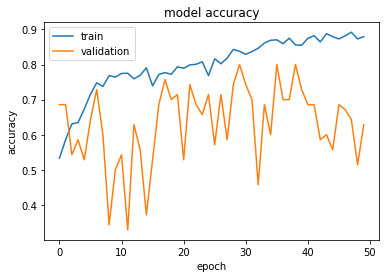

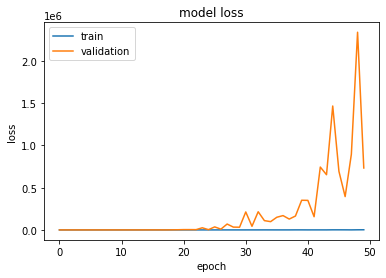

In [30]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('pic/model_history_ADC_acc')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('pic/model_history_ADC_loss')
plt.show()

In [31]:
#model.save('saved_model/ADC_model')

/Users/langletmaxime/miniforge3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/langletmaxime/miniforge3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: saved_model/ADC_model/assets


In [30]:
#model = Sequential()
#model = tf.keras.models.load_model('saved_model/model_combined')
#model.summary()

In [32]:
#testing set, don't touch after im done

#model.evaluate(X[3500:],y[3500:])
model.evaluate(X_test,y_test)
predict = model.predict(X_test)

for i in range(len(predict)):
    if round(predict[i][0]) != y_test[i][0]:
        print(i, predict[i], y_test[i])

3/3 [==============================] - 0s 5ms/step - loss: 37979.5312 - accuracy: 0.6571
7 [0. 1.] [1 0]
9 [1. 0.] [0 1]
15 [1. 0.] [0 1]
18 [1. 0.] [0 1]
19 [0. 1.] [1 0]
21 [1. 0.] [0 1]
22 [1. 0.] [0 1]
23 [0. 1.] [1 0]
30 [0. 1.] [1 0]
32 [1. 0.] [0 1]
33 [0. 1.] [1 0]
36 [1. 0.] [0 1]
40 [1. 0.] [0 1]
43 [0. 1.] [1 0]
47 [1. 0.] [0 1]
49 [1. 0.] [0 1]
50 [1. 0.] [0 1]
51 [1. 0.] [0 1]
52 [1. 0.] [0 1]
53 [1. 0.] [0 1]
56 [1. 0.] [0 1]
62 [1. 0.] [0 1]
64 [1. 0.] [0 1]
69 [0. 1.] [1 0]


In [33]:
con = confusion_matrix(labels=y_test[:,0], predictions=predict[:,0]>0.5)
print(con)

tf.Tensor(
[[41 17]
 [ 7  5]], shape=(2, 2), dtype=int32)


In [34]:
pickle_out = open("base/X_ADC.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("base/y_ADC.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [35]:
pickle_in = open("base/X_ADC.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("base/y_ADC.pickle","rb")
y_test = pickle.load(pickle_in)

y_test = np.asarray(y_test)

print(X_test.shape[:])

(70, 40, 40, 1)


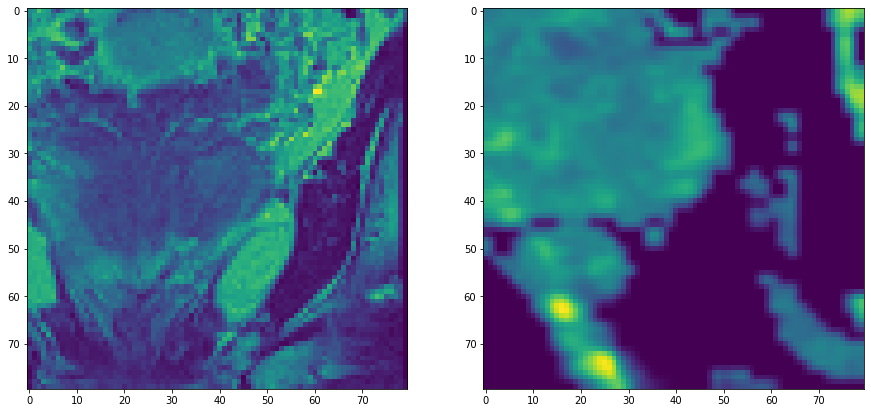

In [37]:
n=15
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(X_test[n][:,:,1])
plt.subplot(1,2,2)
plt.imshow(X_test[n][:,:,0])
plt.show()